# Project - Team (Ayushi Bhatnagar, Mona Sharma, Lavit Hingorani, Saket Sharan, Shobhit Gupta)

## Musing Recommendation using Yahoo Music Dataset

**About the data set:**

The data set consists of 3 tab separated txt files. It was obtained from the Yahoo Labs website in a week after filling out a brief form. The description of the contents of the text files are as follows:

**test_0.txt: **

contains data for 200,000 users. Each user in each training data file has at least 10 observed ratings. Each user has at most one observation for each song. The users are ordered by randomly assigned user id to protect the identity of the users. The observations for each user are listed sequentially, and are ordered by randomly assigned song id. The ratings values are on a scale from 1 to 5. The format of each row of each file is "user id,song id,rating".

song-attributes.txt: 

Each line of this file lists the attributes for a particular song. All atrributes have been given a random value so that we cannot see which song, artist or album it refers to. The available attributes are artist id, album id, and genre id. The format of each row of each file is "song id, album id, artist id, genre id".

genre-hierarchy.txt: 

This file describes the genre hierarchy used by Yahoo! Music. Each line of this file lists the id number for a genre, the id number of the parent of that genre, the level of the genre in the hierarchy, and the name of the genre. Note that songs with no genre assigned by Yahoo! Music have been assigned to the special genre "Unknown". During our analysis we will be ignoring these songs because they are of no use to us and can be considered noise in the data. The format of each row of each file is "genre id, parent genre id, level, genre name".

Loading the data into SQL:

The following commands were run in MySQL Workbench to load the data into the music_project database in our Amazon Instance.
use music_project;
CREATE TABLE ratings (user_id INT, song_id INT, rating INT);
load data infile '/home/ubuntu/data/test_0.txt' into table ratings fields terminated by '\t'
lines terminated by '\n';
CREATE TABLE song_attributes (song_id INT, album_id INT, artist_id INT, genre_id INT);
load data infile '/home/ubuntu/data/song-attributes.txt' into table song_attributes fields terminated by '\t'
lines terminated by '\n';
CREATE TABLE genre_hierarchy (genre_id INT, parent_genre_id INT, level_number INT, genre_name VARCHAR(50));
load data infile '/home/ubuntu/data/genre-hierarchy.txt' into table genre_hierarchy fields terminated by '\t'
lines terminated by '\n';
NOTE: We ran this code in MySQL Workbench

In [2]:
# need to import the numpy and pandas library
import numpy as np
import pandas as pd

In [3]:
col_names = ['_id','release_mbid', 'artist_mbid', 'imUrl','confidence','related','salesRank', 'categories','release_group_mbid','amazon_id','root_genre','title','artist','label','artist_url','first_release_year','songs','price']
df_metadata = pd.read_csv('~/Desktop/metadata.csv', delimiter = ','  , names = col_names, header = None )

df_metadata

/Users/ayushibhatnagar/Documents/Anaconda/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_id,release_mbid,artist_mbid,imUrl,confidence,related,salesRank,categories,release_group_mbid,amazon_id,root_genre,title,artist,label,artist_url,first_release_year,songs,price
0,_id,release-mbid,artist-mbid,imUrl,confidence,related,salesRank,categories,release-group-mbid,amazon-id,root-genre,title,artist,label,artist_url,first-release-year,songs,price
1,ObjectId(58b3624c54e8aa4aa94055a2),NaN,NaN,http://ecx.images-amazon.com/images/I/217zrfsw...,NaN,NaN,"{""Music"":776497}","[[""CDs \u0026 Vinyl"",""Alternative Rock""]]",NaN,B00000007O,Alternative Rock,Stories of the New West,Kent 3,Super Electro,/Kent-3/e/B000APW5GM,NaN,NaN,16.18
2,ObjectId(58b3624c54e8aa4aa94055a3),NaN,NaN,http://ecx.images-amazon.com/images/I/51rKlhSe...,NaN,NaN,"{""Music"":902130}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Ameri...",NaN,1902593375,Alternative Rock,Become the Media,Jello Biafra,AK Press,/Jello-Biafra/e/B000APYL8M,NaN,NaN,29.98
3,ObjectId(58b3624c54e8aa4aa94055a4),359b564b-3db4-44ad-9481-0b45f24aa53e,6ce5815b-b277-48b0-94c9-a87a8f0422b3,http://ecx.images-amazon.com/images/I/6139OLQU...,1,NaN,NaN,"[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Indie...",b05be7e9-6bc4-422b-8198-32945b0d1c76,26197898,Alternative Rock,Southern Fashion,The Sudden Passion,Black Hearts & Pink Parts Records,/s?ie=UTF8&field-artist=The+Sudden+Passion&sea...,2012,"[{""mbid"":""308af531-5fa7-4dd8-969c-6bb7a204eb19...",14.23
4,ObjectId(58b3624c54e8aa4aa94055a5),NaN,NaN,http://ecx.images-amazon.com/images/I/51XGHATB...,NaN,NaN,"{""Music"":652770}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Hardc...",NaN,B0000005U9,Alternative Rock,Live at Electric Ballroom,Vicious White Kids,Receiver/Smg,/Vicious-White-Kids/e/B000APYAWE,NaN,NaN,NaN
5,ObjectId(58b3624c54e8aa4aa94055a6),d22e418c-679d-42c0-991f-7ca12df854e8,b0a16d0c-3d99-487d-be88-902131ad03d3,http://ecx.images-amazon.com/images/I/51OK3665...,1,"{""also_viewed"":[""B00004Y6SW"",""B000002MBE"",""B00...","{""Music"":844130}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Indie...",410326cf-4a38-35d3-93d9-a63f8fb77b5b,B0000004JL,Alternative Rock,Wesley Willis,Wesley Willis,Fuse Records,/Wesley-Willis/e/B000APWAAI,1995,"[{""mbid"":""0dccf187-7b1e-47a0-8b44-1844b9243ee4...",NaN
6,ObjectId(58b3624c54e8aa4aa94055a7),6ee7951d-b652-4005-8abf-fe8dabdacd4b,90967f7a-dccf-43f8-a212-e84b34e24a7d,http://ecx.images-amazon.com/images/I/51V%2B9b...,1,NaN,"{""Music"":1805639}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Hardc...",8bf59352-fa43-36b5-b883-31520b78206e,B0000005VX,Alternative Rock,Emergency,999,Receiver (UK),/999/e/B000APW77Y,1997,"[{""mbid"":""079a0fc0-cc6a-4fe5-94c7-4d8ea8b8194e...",4.69
7,ObjectId(58b3624c54e8aa4aa94055a8),5a717fed-9ba6-347c-93ad-59524c61ad31,084308bd-1654-436f-ba03-df6697104e19,http://ecx.images-amazon.com/images/I/514507RC...,0.96875,"{""also_bought"":[""B000JMKKG8"",""B000068OT2"",""B00...","{""Music"":170755}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Hardc...",f379b19e-0a47-3d28-b5be-595e34cba7d3,B000000FGD,Alternative Rock,"1,039 / Smoothed Out Slappy Hours",Green Day,Lookout Records/Tvt,/Green-Day/e/B000APYLTG,1991,"[{""mbid"":""0f3254ef-7f45-4b46-83f9-b99a4a91bd4b...",8.99
8,ObjectId(58b3624c54e8aa4aa94055a9),2bbfcc1d-d1a3-460c-bb45-ca1b2b48c8c4,eb0cd72f-0235-47ec-9d0b-f244a2afc3b7,http://ecx.images-amazon.com/images/I/51x8skEG...,1,"{""also_bought"":[""B000000HOX"",""B008B2IJ02"",""B00...","{""Music"":530408}","[[""CDs \u0026 Vinyl"",""Alternative Rock""]]",bc2acb6a-4998-3cd3-97e2-61025ed8a562,630251228X,Alternative Rock,Exile,Geoffrey Oryema,emi france,/Geoffrey-Oryema/e/B000APWJ7M,1990,"[{""mbid"":""2995847a-95ce-4182-aebd-92499e98f734...",7.18
9,ObjectId(58b3624c54e8aa4aa94055aa),6800598b-1281-41e7-b824-656b17589be2,51cb9a1a-cc3f-48e6-85c4-b0843fc7b697,http://ecx.images-amazon.com/images/I/315PFDF7...,1,"{""also_bought"":[""B00000IMYY"",""B00004YTRZ"",""B00...","{""Music"":431725}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Hardc...",830b821a-6044-32ad-a980-3ab416f36993,B000000F

In [4]:
col_names =  ['_id','reviewerID', 'amazon_id', 'reviewerName','helpful', 'unixReviewTime', 'reviewText','overall','reviewTime','summary']
df_review = pd.read_csv('~/Desktop/review.csv', delimiter = ','  , names = col_names, header = None )

df_review

/Users/ayushibhatnagar/Documents/Anaconda/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_id,reviewerID,amazon_id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary
0,_id,reviewerID,amazon-id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary
1,ObjectId(58b362c054e8aa4aa94155c0),A1BT6LQ9NY6RO3,615205399,"Jasa Swaze ""Jasa Swaze""","[1,1]",1214352000,I am a beginner and have tried a couple of med...,5,"06 25, 2008",Change Your LIfe for the Better!
2,ObjectId(58b362c054e8aa4aa94155c1),A206OKO2FE2IPL,615205399,J. Jenson,"[1,1]",1229212800,This is coming from a person that didn't belie...,5,"12 14, 2008",Mediation couldn't get any easier
3,ObjectId(58b362c054e8aa4aa94155c2),A1OFY4ATO7D13W,26197898,"Jacob Shepich ""Neo-Luddite""","[2,2]",1355702400,Buy this album. Now. Don't worry about the re...,5,"12 17, 2012",PITCHFORK Eat your heart out!
4,ObjectId(58b362c054e8aa4aa94155c3),A2KH83L1F70QR8,26197898,"John Stockton ""JLS""","[1,1]",1358121600,The Sudden Passion did a great job with this o...,5,"01 14, 2013",Americana from the Southlands
5,ObjectId(58b362c054e8aa4aa94155c4),A1KGXC7IRLVJR3,615205399,"Amy Elizabeth ""Amy""","[0,0]",1214438400,I received this CD as a gift a few weeks ago f...,5,"06 26, 2008",It really works!
6,ObjectId(58b362c054e8aa4aa94155c5),A2VS3GBVNS30FP,615205399,Norah Powell,"[1,1]",1214352000,"One of the things I liked best about this CD, ...",5,"06 25, 2008","Short, sweet and to the point"
7,ObjectId(58b362c054e8aa4aa94155c6),A1QWY3NX5E20NP,615205399,W. Chien,"[2,2]",1214092800,"The sound of ""OM"" creates serenity, it helps y...",5,"06 22, 2008",A Great Meditation CD for Beginners
8,ObjectId(58b362c054e8aa4aa94155c7),A1X4QKQPWS2H09,615205399,Liz Schultz,"[1,1]",1256601600,This is a fantastic meditation CD. Have you e...,5,"10 27, 2009",Excellent! Best Meditation CD that I have used!
9,ObjectId(58b362c054e8aa4aa94155c8),A1WFVI2N1Q63JK,739356046,Catherine Daly,"[0,2]",1211155200,Mu Friend loved the book that I got him for hi...,5,"05 19, 2008",Rabbit Ears Treasury of Christmas Stories: Vol...


In [5]:
df_metadata_copy = df_metadata
df_metadata_copy = df_metadata_copy.drop([0])

df_review_copy = df_review
df_review_copy = df_review_copy.drop([0])

In [6]:
df_metadata_copy

,_id,release_mbid,artist_mbid,imUrl,confidence,related,salesRank,categories,release_group_mbid,amazon_id,root_genre,title,artist,label,artist_url,first_release_year,songs,price
1,ObjectId(58b3624c54e8aa4aa94055a2),NaN,NaN,http://ecx.images-amazon.com/images/I/217zrfsw...,NaN,NaN,"{""Music"":776497}","[[""CDs \u0026 Vinyl"",""Alternative Rock""]]",NaN,B00000007O,Alternative Rock,Stories of the New West,Kent 3,Super Electro,/Kent-3/e/B000APW5GM,NaN,NaN,16.18
2,ObjectId(58b3624c54e8aa4aa94055a3),NaN,NaN,http://ecx.images-amazon.com/images/I/51rKlhSe...,NaN,NaN,"{""Music"":902130}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Ameri...",NaN,1902593375,Alternative Rock,Become the Media,Jello Biafra,AK Press,/Jello-Biafra/e/B000APYL8M,NaN,NaN,29.98
3,ObjectId(58b3624c54e8aa4aa94055a4),359b564b-3db4-44ad-9481-0b45f24aa53e,6ce5815b-b277-48b0-94c9-a87a8f0422b3,http://ecx.images-amazon.com/images/I/6139OLQU...,1,NaN,NaN,"[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Indie...",b05be7e9-6bc4-422b-8198-32945b0d1c76,26197898,Alternative Rock,Southern Fashion,The Sudden Passion,Black Hearts & Pink Parts Records,/s?ie=UTF8&field-artist=The+Sudden+Passion&sea...,2012,"[{""mbid"":""308af531-5fa7-4dd8-969c-6bb7a204eb19...",14.23
4,ObjectId(58b3624c54e8aa4aa94055a5),NaN,NaN,http://ecx.images-amazon.com/images/I/51XGHATB...,NaN,NaN,"{""Music"":652770}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Hardc...",NaN,B0000005U9,Alternative Rock,Live at Electric Ballroom,Vicious White Kids,Receiver/Smg,/Vicious-White-Kids/e/B000APYAWE,NaN,NaN,NaN
5,ObjectId(58b3624c54e8aa4aa94055a6),d22e418c-679d-42c0-991f-7ca12df854e8,b0a16d0c-3d99-487d-be88-902131ad03d3,http://ecx.images-amazon.com/images/I/51OK3665...,1,"{""also_viewed"":[""B00004Y6SW"",""B000002MBE"",""B00...","{""Music"":844130}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Indie...",410326cf-4a38-35d3-93d9-a63f8fb77b5b,B0000004JL,Alternative Rock,Wesley Willis,Wesley Willis,Fuse Records,/Wesley-Willis/e/B000APWAAI,1995,"[{""mbid"":""0dccf187-7b1e-47a0-8b44-1844b9243ee4...",NaN
6,ObjectId(58b3624c54e8aa4aa94055a7),6ee7951d-b652-4005-8abf-fe8dabdacd4b,90967f7a-dccf-43f8-a212-e84b34e24a7d,http://ecx.images-amazon.com/images/I/51V%2B9b...,1,NaN,"{""Music"":1805639}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Hardc...",8bf59352-fa43-36b5-b883-31520b78206e,B0000005VX,Alternative Rock,Emergency,999,Receiver (UK),/999/e/B000APW77Y,1997,"[{""mbid"":""079a0fc0-cc6a-4fe5-94c7-4d8ea8b8194e...",4.69
7,ObjectId(58b3624c54e8aa4aa94055a8),5a717fed-9ba6-347c-93ad-59524c61ad31,084308bd-1654-436f-ba03-df6697104e19,http://ecx.images-amazon.com/images/I/514507RC...,0.96875,"{""also_bought"":[""B000JMKKG8"",""B000068OT2"",""B00...","{""Music"":170755}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Hardc...",f379b19e-0a47-3d28-b5be-595e34cba7d3,B000000FGD,Alternative Rock,"1,039 / Smoothed Out Slappy Hours",Green Day,Lookout Records/Tvt,/Green-Day/e/B000APYLTG,1991,"[{""mbid"":""0f3254ef-7f45-4b46-83f9-b99a4a91bd4b...",8.99
8,ObjectId(58b3624c54e8aa4aa94055a9),2bbfcc1d-d1a3-460c-bb45-ca1b2b48c8c4,eb0cd72f-0235-47ec-9d0b-f244a2afc3b7,http://ecx.images-amazon.com/images/I/51x8skEG...,1,"{""also_bought"":[""B000000HOX"",""B008B2IJ02"",""B00...","{""Music"":530408}","[[""CDs \u0026 Vinyl"",""Alternative Rock""]]",bc2acb6a-4998-3cd3-97e2-61025ed8a562,630251228X,Alternative Rock,Exile,Geoffrey Oryema,emi france,/Geoffrey-Oryema/e/B000APWJ7M,1990,"[{""mbid"":""2995847a-95ce-4182-aebd-92499e98f734...",7.18
9,ObjectId(58b3624c54e8aa4aa94055aa),6800598b-1281-41e7-b824-656b17589be2,51cb9a1a-cc3f-48e6-85c4-b0843fc7b697,http://ecx.images-amazon.com/images/I/315PFDF7...,1,"{""also_bought"":[""B00000IMYY"",""B00004YTRZ"",""B00...","{""Music"":431725}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Hardc...",830b821a-6044-32ad-a980-3ab416f36993,B000000FH9,Alternative Rock,Choice of a New Generation,Fifteen,Lookout -- Mordam --,/Fifteen/e/B000APVLX0,1994,"[{""mbid"":""037eec9b-7946-490e-b946-8f52c38e841f...",NaN
10,ObjectId(58b3

In [7]:
df_review_copy

,_id,reviewerID,amazon_id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary
1,ObjectId(58b362c054e8aa4aa94155c0),A1BT6LQ9NY6RO3,615205399,"Jasa Swaze ""Jasa Swaze""","[1,1]",1214352000,I am a beginner and have tried a couple of med...,5,"06 25, 2008",Change Your LIfe for the Better!
2,ObjectId(58b362c054e8aa4aa94155c1),A206OKO2FE2IPL,615205399,J. Jenson,"[1,1]",1229212800,This is coming from a person that didn't belie...,5,"12 14, 2008",Mediation couldn't get any easier
3,ObjectId(58b362c054e8aa4aa94155c2),A1OFY4ATO7D13W,26197898,"Jacob Shepich ""Neo-Luddite""","[2,2]",1355702400,Buy this album. Now. Don't worry about the re...,5,"12 17, 2012",PITCHFORK Eat your heart out!
4,ObjectId(58b362c054e8aa4aa94155c3),A2KH83L1F70QR8,26197898,"John Stockton ""JLS""","[1,1]",1358121600,The Sudden Passion did a great job with this o...,5,"01 14, 2013",Americana from the Southlands
5,ObjectId(58b362c054e8aa4aa94155c4),A1KGXC7IRLVJR3,615205399,"Amy Elizabeth ""Amy""","[0,0]",1214438400,I received this CD as a gift a few weeks ago f...,5,"06 26, 2008",It really works!
6,ObjectId(58b362c054e8aa4aa94155c5),A2VS3GBVNS30FP,615205399,Norah Powell,"[1,1]",1214352000,"One of the things I liked best about this CD, ...",5,"06 25, 2008","Short, sweet and to the point"
7,ObjectId(58b362c054e8aa4aa94155c6),A1QWY3NX5E20NP,615205399,W. Chien,"[2,2]",1214092800,"The sound of ""OM"" creates serenity, it helps y...",5,"06 22, 2008",A Great Meditation CD for Beginners
8,ObjectId(58b362c054e8aa4aa94155c7),A1X4QKQPWS2H09,615205399,Liz Schultz,"[1,1]",1256601600,This is a fantastic meditation CD. Have you e...,5,"10 27, 2009",Excellent! Best Meditation CD that I have used!
9,ObjectId(58b362c054e8aa4aa94155c8),A1WFVI2N1Q63JK,739356046,Catherine Daly,"[0,2]",1211155200,Mu Friend loved the book that I got him for hi...,5,"05 19, 2008",Rabbit Ears Treasury of Christmas Stories: Vol...
10,ObjectId(58b362c054e8aa4aa94155c9),AHGNO0MV9QOGD,741301679,"Nikki ""Loves good books""","[6,12]",1094515200,"Although the quality of the CD set was fine, I...",2,"09 7, 2004",Suspense CD


In [10]:
result = df_review_copy.merge(df_metadata_copy, on='amazon_id', how = 'left')
result

,_id_x,reviewerID,amazon_id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary,...,categories,release_group_mbid,root_genre,title,artist,label,artist_url,first_release_year,songs,price
0,ObjectId(58b362c054e8aa4aa94155c0),A1BT6LQ9NY6RO3,615205399,"Jasa Swaze ""Jasa Swaze""","[1,1]",1214352000,I am a beginner and have tried a couple of med...,5,"06 25, 2008",Change Your LIfe for the Better!,...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
1,ObjectId(58b362c054e8aa4aa94155c1),A206OKO2FE2IPL,615205399,J. Jenson,"[1,1]",1229212800,This is coming from a person that didn't belie...,5,"12 14, 2008",Mediation couldn't get any easier,...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
2,ObjectId(58b362c054e8aa4aa94155c2),A1OFY4ATO7D13W,26197898,"Jacob Shepich ""Neo-Luddite""","[2,2]",1355702400,Buy this album. Now. Don't worry about the re...,5,"12 17, 2012",PITCHFORK Eat your heart out!,...,"[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Indie...",b05be7e9-6bc4-422b-8198-32945b0d1c76,Alternative Rock,Southern Fashion,The Sudden Passion,Black Hearts & Pink Parts Records,/s?ie=UTF8&field-artist=The+Sudden+Passion&sea...,2012,"[{""mbid"":""308af531-5fa7-4dd8-969c-6bb7a204eb19...",14.23
3,ObjectId(58b362c054e8aa4aa94155c3),A2KH83L1F70QR8,26197898,"John Stockton ""JLS""","[1,1]",1358121600,The Sudden Passion did a great job with this o...,5,"01 14, 2013",Americana from the Southlands,...,"[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Indie...",b05be7e9-6bc4-422b-8198-32945b0d1c76,Alternative Rock,Southern Fashion,The Sudden Passion,Black Hearts & Pink Parts Records,/s?ie=UTF8&field-artist=The+Sudden+Passion&sea...,2012,"[{""mbid"":""308af531-5fa7-4dd8-969c-6bb7a204eb19...",14.23
4,ObjectId(58b362c054e8aa4aa94155c4),A1KGXC7IRLVJR3,615205399,"Amy Elizabeth ""Amy""","[0,0]",1214438400,I received this CD as a gift a few weeks ago f...,5,"06 26, 2008",It really works!,...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
5,ObjectId(58b362c054e8aa4aa94155c5),A2VS3GBVNS30FP,615205399,Norah Powell,"[1,1]",1214352000,"One of the things I liked best about this CD, ...",5,"06 25, 2008","Short, sweet and to the point",...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
6,ObjectId(58b362c054e8aa4aa94155c6),A1QWY3NX5E20NP,615205399,W. Chien,"[2,2]",1214092800,"The sound of ""OM"" creates serenity, it helps y...",5,"06 22, 2008",A Great Meditation CD for Beginners,...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
7,ObjectId(58b362c054e8aa4aa94155c7),A1X4QKQPWS2H09,615205399,Liz Schultz,"[1,1]",1256601600,This is a fantastic meditation CD. Have you e...,5,"10 27, 2009",Excellent! Best Meditation CD that I have used!,...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
8,ObjectId(58b362c054e8aa4aa94155c8),A1WFVI2N1Q63JK,739356046,Catherine Daly,"[0,2]",1211155200,Mu Friend loved the book that I got him for hi...,5,"05 19, 2008",Rabbit Ears Treasury of Christmas Stories: Vol...,...,"[[""CDs \u0026 Vinyl"",""Pop"",""Vocal Pop""]]",NaN,Pop,Treasury of Christmas Stories Vol. 1,Rabbit

*********************
Fact Discovery
********************

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
cleanResult = result.dropna(how='any')

cleanResult

,_id_x,reviewerID,amazon_id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary,...,categories,release_group_mbid,root_genre,title,artist,label,artist_url,first_release_year,songs,price
195,ObjectId(58b362c054e8aa4aa9415683),A2I91CUY72DWU1,1557252920,"Rev. Ben Cox ""revben""","[13,13]",1274486400,When I was in Music School at Stetson Universi...,5,"05 22, 2010",A Great Teaching tool,...,"[[""CDs \u0026 Vinyl"",""Classical"",""Sacred \u002...",189c37fb-29c6-4727-a04b-69286e2e7172,Classical,Learning About Gregorian Chant,Monastic Choir of Solesmes,Solesmes,/s?ie=UTF8&field-artist=Monastic+Choir+of+Sole...,2002,"[{""mbid"":""05c87acd-bd9b-431c-82e0-3f23f5679fa5...",15
1633,ObjectId(58b362c154e8aa4aa9415c21),A2ZMSGTCOKKFEI,5557530584,"80363 ""80363""","[0,0]",1221177600,I thought cds where all the songs rock were a ...,5,"09 12, 2008",UNBELIEVABLE!!!,...,"[[""CDs \u0026 Vinyl"",""Metal"",""Alternative Meta...",05357819-7714-392b-ac79-145ee69ab071,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99
1634,ObjectId(58b362c154e8aa4aa9415c22),A11RD5YOMUNFJ8,5557530584,Abbey Brown,"[1,1]",1235779200,"Even though I am not a Christian, Flyleaf is o...",4,"02 28, 2009",Fully Alive,...,"[[""CDs \u0026 Vinyl"",""Metal"",""Alternative Meta...",05357819-7714-392b-ac79-145ee69ab071,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99
1635,ObjectId(58b362c154e8aa4aa9415c23),A21AMFQK5SGWTC,5557530584,"Adipocere ""adipocere""","[0,0]",1154563200,"The video for ""I'm so sick"" grabs you, shakes ...",3,"08 3, 2006",Flyleaf: Don't judge a group by its video,...,"[[""CDs \u0026 Vinyl"",""Metal"",""Alternative Meta...",05357819-7714-392b-ac79-145ee69ab071,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99
1636,ObjectId(58b362c154e8aa4aa9415c24),A343M1PHQI1QYL,5557530584,A. D. Ramos,"[1,2]",1219449600,This CD was surprisingly better than I though...,5,"08 23, 2008",Music like I haven't heard in a while,...,"[[""CDs \u0026 Vinyl"",""Metal"",""Alternative Meta...",05357819-7714-392b-ac79-145ee69ab071,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99
1638,ObjectId(58b362c154e8aa4aa9415c26),A2TUAPO0ZW58QP,5557530584,Ais,"[0,0]",1391212800,I got the CD in the mail before it was estimat...,4,"02 1, 2014",Yay!,...,"[[""CDs \u0026 Vinyl"",""Metal"",""Alternative Meta...",05357819-7714-392b-ac79-145ee69ab071,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99
1639,ObjectId(58b362c154e8aa4aa9415c27),A2PBH7IXBD6FZ2,5557530584,"Alejandro Ramirez ""Diggidy""","[2,3]",1136505600,"I'll admit, I am not quite a huge rock fanatic...",4,"01 6, 2006",A Fresh Debut for Flyleaf,...,"[[""CDs \u0026 Vinyl"",""Metal"",""Alternative Meta...",05357819-7714-392b-ac79-145ee69ab071,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99
1640,ObjectId(58b362c154e8aa4aa9415c28),AZSN1TO0JI87B,5557530584,A. Estes,"[16,17]",1136505600,My introduction to Flyleaf was actually uninte...,4,"01 6, 2006",A Great Debut With Plenty Of Room For Growth,...,"[[""CDs \u0026 Vinyl"",""Metal"",""Alternative Meta...",05357819-7714-392b-ac79-145ee69ab071,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99
1641,ObjectId(58b362c154e8aa4aa9415c29),AOM3ISY7XMDT3,5557530584,"Amazon Customer ""eckhart44""","[0,1]",1195948800,There's no need to bash them. Lacey has an ama...,5,"11 25, 2007",Enough is Enough.,...,"[[""CDs \u0026 Vinyl"",""Metal"",""Alternative Meta...",05357819-7714-392b-ac79-145ee69ab071,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99
1642,ObjectId(58b362c154e8

In [13]:
cleanResult['firstRelease'] = 0
cleanResult['overal'] = 0
list = cleanResult[['first_release_year']].apply(pd.to_numeric)
cleanResult['firstRelease'] = list
list1 = cleanResult[['overall']].apply(pd.to_numeric)
cleanResult['overal'] = list1
cleanResult

/Users/ayushibhatnagar/Documents/Anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/ayushibhatnagar/Documents/Anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/ayushibhatnagar/Documents/Anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,_id_x,reviewerID,amazon_id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary,...,root_genre,title,artist,label,artist_url,first_release_year,songs,price,firstRelease,overal
195,ObjectId(58b362c054e8aa4aa9415683),A2I91CUY72DWU1,1557252920,"Rev. Ben Cox ""revben""","[13,13]",1274486400,When I was in Music School at Stetson Universi...,5,"05 22, 2010",A Great Teaching tool,...,Classical,Learning About Gregorian Chant,Monastic Choir of Solesmes,Solesmes,/s?ie=UTF8&field-artist=Monastic+Choir+of+Sole...,2002,"[{""mbid"":""05c87acd-bd9b-431c-82e0-3f23f5679fa5...",15,2002.0,5
1633,ObjectId(58b362c154e8aa4aa9415c21),A2ZMSGTCOKKFEI,5557530584,"80363 ""80363""","[0,0]",1221177600,I thought cds where all the songs rock were a ...,5,"09 12, 2008",UNBELIEVABLE!!!,...,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99,2004.0,5
1634,ObjectId(58b362c154e8aa4aa9415c22),A11RD5YOMUNFJ8,5557530584,Abbey Brown,"[1,1]",1235779200,"Even though I am not a Christian, Flyleaf is o...",4,"02 28, 2009",Fully Alive,...,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99,2004.0,4
1635,ObjectId(58b362c154e8aa4aa9415c23),A21AMFQK5SGWTC,5557530584,"Adipocere ""adipocere""","[0,0]",1154563200,"The video for ""I'm so sick"" grabs you, shakes ...",3,"08 3, 2006",Flyleaf: Don't judge a group by its video,...,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99,2004.0,3
1636,ObjectId(58b362c154e8aa4aa9415c24),A343M1PHQI1QYL,5557530584,A. D. Ramos,"[1,2]",1219449600,This CD was surprisingly better than I though...,5,"08 23, 2008",Music like I haven't heard in a while,...,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99,2004.0,5
1638,ObjectId(58b362c154e8aa4aa9415c26),A2TUAPO0ZW58QP,5557530584,Ais,"[0,0]",1391212800,I got the CD in the mail before it was estimat...,4,"02 1, 2014",Yay!,...,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99,2004.0,4
1639,ObjectId(58b362c154e8aa4aa9415c27),A2PBH7IXBD6FZ2,5557530584,"Alejandro Ramirez ""Diggidy""","[2,3]",1136505600,"I'll admit, I am not quite a huge rock fanatic...",4,"01 6, 2006",A Fresh Debut for Flyleaf,...,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99,2004.0,4
1640,ObjectId(58b362c154e8aa4aa9415c28),AZSN1TO0JI87B,5557530584,A. Estes,"[16,17]",1136505600,My introduction to Flyleaf was actually uninte...,4,"01 6, 2006",A Great Debut With Plenty Of Room For Growth,...,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99,2004.0,4
1641,ObjectId(58b362c154e8aa4aa9415c29),AOM3ISY7XMDT3,5557530584,"Amazon Customer ""eckhart44""","[0,1]",1195948800,There's no need to bash them. Lacey has an ama...,5,"11 25, 2007",Enough is Enough.,...,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99,2004.0,5
1642,ObjectId(58b362c154e8aa4aa9415c2a),A1OHD6GLHHKLKQ,5557530584,Amber Serna,"[3,4]",1203724800,I don't think I have taken it out of my cd pla...,5,"02 23, 2008",Absolute inspiration!,...,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99,2004.0,5


In [14]:
cleanResult = cleanResult.sort_values(['firstRelease'])

cleanResult

,_id_x,reviewerID,amazon_id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary,...,root_genre,title,artist,label,artist_url,first_release_year,songs,price,firstRelease,overal
71068,ObjectId(58b362c854e8aa4aa9426b5c),A3BBA2WNGS6Q2I,B00002DEIM,"""johnnyg316""","[1,2]",960768000,This is CD must have for anyone with too much ...,5,"06 12, 2000",Great on many levels,...,Classical,Ave Maria,Leonard Bernstein,Teldec,/s?ie=UTF8&field-artist=Leonard+Bernstein&sear...,1890,"[{""mbid"":""ee2bfc40-4531-4c3a-a4bb-31878a75a37a...",11.21,1890.0,5
71073,ObjectId(58b362c854e8aa4aa9426b61),AAS4001IECCHH,B00002DEIM,Randolph R. Wagner,"[12,14]",1104364800,"""What was he thinking?"" is the question for th...",3,"12 30, 2004","Loads of diversity, a whole lotta schlock and ...",...,Classical,Ave Maria,Leonard Bernstein,Teldec,/s?ie=UTF8&field-artist=Leonard+Bernstein&sear...,1890,"[{""mbid"":""ee2bfc40-4531-4c3a-a4bb-31878a75a37a...",11.21,1890.0,3
71072,ObjectId(58b362c854e8aa4aa9426b60),A2YUKQLRB86SWQ,B00002DEIM,Loring Ivanick,"[3,11]",1066435200,I wish to make a correction to a review below....,2,"10 18, 2003",Correction of another review,...,Classical,Ave Maria,Leonard Bernstein,Teldec,/s?ie=UTF8&field-artist=Leonard+Bernstein&sear...,1890,"[{""mbid"":""ee2bfc40-4531-4c3a-a4bb-31878a75a37a...",11.21,1890.0,2
71071,ObjectId(58b362c854e8aa4aa9426b5f),A1OU3NGCL2QESQ,B00002DEIM,"Walter Kuchinsky ""dracula@intergrafix.net""","[5,17]",1013558400,not as good as I thought it was going to be,1,"02 13, 2002",NOT AS GOOD AS I THOUGHT IT WAS GOING TO BE,...,Classical,Ave Maria,Leonard Bernstein,Teldec,/s?ie=UTF8&field-artist=Leonard+Bernstein&sear...,1890,"[{""mbid"":""ee2bfc40-4531-4c3a-a4bb-31878a75a37a...",11.21,1890.0,1
71069,ObjectId(58b362c854e8aa4aa9426b5d),A36IXHY5V536AM,B00002DEIM,nate,"[3,10]",962323200,lots of different kinds of music best one was ...,4,"06 30, 2000",mixed bag,...,Classical,Ave Maria,Leonard Bernstein,Teldec,/s?ie=UTF8&field-artist=Leonard+Bernstein&sear...,1890,"[{""mbid"":""ee2bfc40-4531-4c3a-a4bb-31878a75a37a...",11.21,1890.0,4
71062,ObjectId(58b362c854e8aa4aa9426b56),A3RTIQVULFXZIR,B00002DEIM,blue-59,"[4,5]",1089676800,&quot;Overplayed and overvalued&quot; applies ...,1,"07 13, 2004",Let's not overgeneralize,...,Classical,Ave Maria,Leonard Bernstein,Teldec,/s?ie=UTF8&field-artist=Leonard+Bernstein&sear...,1890,"[{""mbid"":""ee2bfc40-4531-4c3a-a4bb-31878a75a37a...",11.21,1890.0,1
71067,ObjectId(58b362c854e8aa4aa9426b5b),AJZ66QCUAA5GJ,B00002DEIM,"John Morning ""urbanshaker""","[0,0]",1228003200,Excellent service from an Amazon ancillary. I...,5,"11 30, 2008",Ave Maria,...,Classical,Ave Maria,Leonard Bernstein,Teldec,/s?ie=UTF8&field-artist=Leonard+Bernstein&sear...,1890,"[{""mbid"":""ee2bfc40-4531-4c3a-a4bb-31878a75a37a...",11.21,1890.0,5
71066,ObjectId(58b362c854e8aa4aa9426b5a),A3TWBRN2T273WT,B00002DEIM,"Amateur Singer ""Amateur Singer""","[1,1]",1266278400,I will concede that this disc does not contain...,4,"02 16, 2010",Spare me the snobbery of the Educated Musical ...,...,Classical,Ave Maria,Leonard Bernstein,Teldec,/s?ie=UTF8&field-artist=Leonard+Bernstein&sear...,1890,"[{""mbid"":""ee2bfc40-4531-4c3a-a4bb-31878a75a37a...",11.21,1890.0,4
71063,ObjectId(58b362c854e8aa4aa9426b57),A15WL4KV8Z2FC7,B00002DEIM,"HAN ""HAN""","[7,8]",1186617600,"Some of the songs, although having nothing to ...",2,"08 9, 2007",An incongruent compilation with the name Maria...,...,Classical,Ave Maria,Leonard Bernstein,Teldec,/s?ie=UTF8&field-artist=Leonard+Bernstein&sear...,1890,"[{""mbid"":""ee2bfc40-4531-4c3a-a4bb-31878a75a37a...",11.21,1890.0,2
71064,ObjectId(58b362c854e8aa4aa9426b58),A70F108EN29KY,B00002DEIM,Jeffrey M Waters,"[3,4]",960854400,I really enjoy this CD. Several songs that sta...,4,"06 13, 2000",This is a pretty good CD!,...,Classical,Ave Maria,Leonard Bernstein,Teldec,/s?ie=UTF8&field-artist=Leonard+Bernstein&sear...,1890,"[{""mbid"":""ee2bfc40-4531-4c3a-a4bb-31878a75a37a...",11.21,1890.0,4


In [15]:
resultsort1= pd.core.frame.DataFrame({'Count' : cleanResult.groupby('firstRelease').reviewerName.nunique()}).reset_index()
resultsort1



,firstRelease,Count
0,1890.0,11
1,1912.0,1
2,1933.0,1
3,1936.0,1
4,1940.0,8
5,1944.0,16
6,1947.0,4
7,1948.0,3
8,1949.0,21
9,1950.0,15


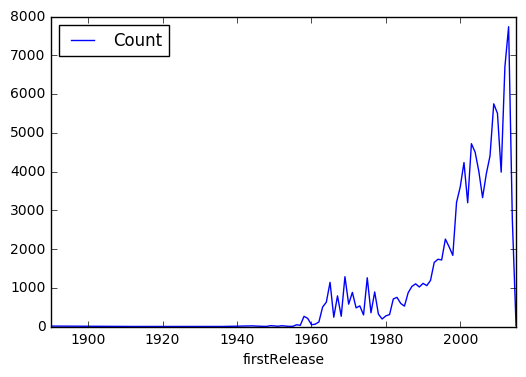

In [16]:
resultsort1.plot( x = 'firstRelease', y ='Count' , kind = 'line' )

In [17]:
genre = cleanResult.groupby('root_genre').root_genre.nunique()
genre

root_genre
Alternative Rock      1
Blues                 1
Classical             1
Country               1
Dance & Electronic    1
Folk                  1
Gospel                1
Jazz                  1
Latin Music           1
Metal                 1
New Age               1
Pop                   1
R&B                   1
Rap & Hip-Hop         1
Reggae                1
Rock                  1
Name: root_genre, dtype: int64

In [18]:
artist = cleanResult.groupby('artist').artist.nunique()
artist.count()

6415

In [19]:
firstRelease = cleanResult.groupby('firstRelease').firstRelease.nunique()
firstRelease.count()

75

In [20]:
avgRating = cleanResult.groupby(['artist'])['overal'].mean()
avgRating = pd.DataFrame(avgRating)
avgRating

,overal
artist,
009 Sound System,2.000000
1 Girl Nation,4.866667
"10,000 Maniacs, The Smithereens,The Replacements, Robert Plant, R.E.M., The Church, Suzanne Vega,Red Hot Chili Peppers, Jane's Addiction, Public Enemy, John Cougar Mellencamp Rod Stewart",5.000000
100 Bible Songs for Kids,4.500000
100 Greatest TV Themes,3.000000
100 R & B Classics-the Anthems,3.500000
100 TV Themes,3.423077
101 Running Songs Lap 2,4.000000
101 Strings,3.666667


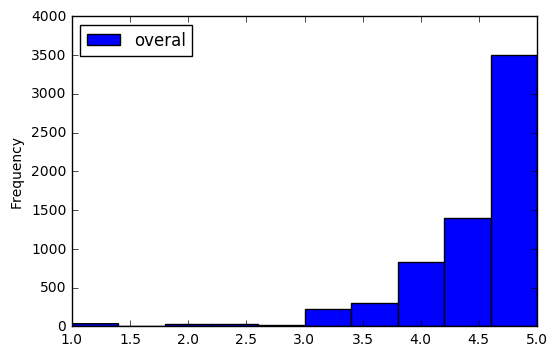

In [21]:
avgRating.plot(kind = 'hist')

In [22]:
avgGenre = cleanResult.groupby(['root_genre'])['overal'].mean()
avgGenre= pd.DataFrame(avgGenre)
avgGenre


,overal
root_genre,
Alternative Rock,4.456658
Blues,4.630872
Classical,4.514572
Country,4.650336
Dance & Electronic,4.436923
Folk,4.594954
Gospel,4.572581
Jazz,4.537946
Latin Music,4.556357


In [23]:
avgGenre.max()

overal    4.650336
dtype: float64

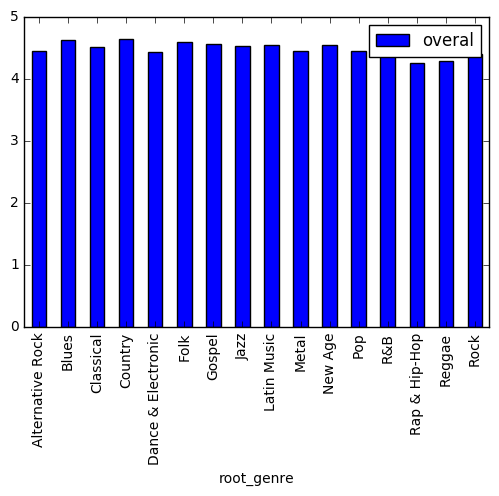

In [32]:
avgGenre.plot(kind = 'bar')

In [116]:
releasePop = cleanResult.groupby(['firstRelease','root_genre'])['overal'].mean()

releasePop = pd.DataFrame(releasePop)
releasePop

# for index, group in cleanResult.groupby(['firstRelease']):
#     group_agg = group.groupby(['root_genre']).aggregate(np.mean)
#     group_agg.plot( y='overal', label=index)

# grpagr = cleanResult.groupby(['root_genre'])
# grpagr



,,overal
firstRelease,root_genre,
1890.0,Classical,3.272727
1912.0,Pop,5.000000
1933.0,Jazz,3.000000
1936.0,Jazz,5.000000
1940.0,Classical,4.875000
1944.0,Classical,4.437500
1947.0,Pop,5.000000
1948.0,Jazz,4.333333
1949.0,Jazz,4.333333


In [121]:
from IPython.display import Image


In [122]:
Image(filename='~/Desktop/1.png') 

FileNotFoundError: [Errno 2] No such file or directory: '~/Desktop/1.png'

In [251]:
d = {'one' : pd.Series(['a','b','c','a']),'two' : pd.Series([1., 2., 3., 4.]), 'three' : pd.Series([101., 102., 3., 4.])}
df = pd.DataFrame(d)
df

,one,three,two
0,a,101.0,1.0
1,b,102.0,2.0
2,c,3.0,3.0
3,a,4.0,4.0


one
a    2.5
b    2.0
c    3.0
Name: two, dtype: float64

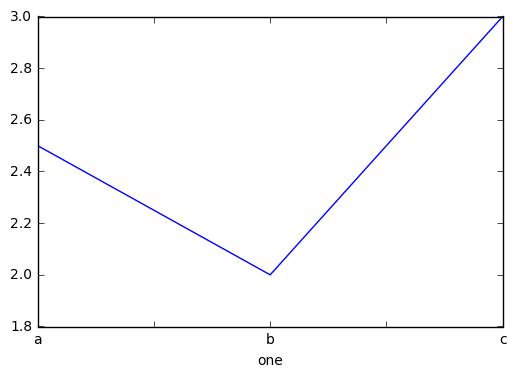

In [254]:
y.plot(kind = 'line')

*****************
Sentiment Analysis
*****************

In [80]:
result_copy = result
result_copy

,_id_x,reviewerID,amazon-id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary,...,categories,release-group-mbid,root-genre,title,artist,label,artist_url,first-release-year,songs,price
0,ObjectId(58b362c054e8aa4aa94155c0),A1BT6LQ9NY6RO3,615205399,"Jasa Swaze ""Jasa Swaze""","[1,1]",1214352000,I am a beginner and have tried a couple of med...,5,"06 25, 2008",Change Your LIfe for the Better!,...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
1,ObjectId(58b362c054e8aa4aa94155c1),A206OKO2FE2IPL,615205399,J. Jenson,"[1,1]",1229212800,This is coming from a person that didn't belie...,5,"12 14, 2008",Mediation couldn't get any easier,...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
2,ObjectId(58b362c054e8aa4aa94155c2),A1OFY4ATO7D13W,26197898,"Jacob Shepich ""Neo-Luddite""","[2,2]",1355702400,Buy this album. Now. Don't worry about the re...,5,"12 17, 2012",PITCHFORK Eat your heart out!,...,"[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Indie...",b05be7e9-6bc4-422b-8198-32945b0d1c76,Alternative Rock,Southern Fashion,The Sudden Passion,Black Hearts & Pink Parts Records,/s?ie=UTF8&field-artist=The+Sudden+Passion&sea...,2012,"[{""mbid"":""308af531-5fa7-4dd8-969c-6bb7a204eb19...",14.23
3,ObjectId(58b362c054e8aa4aa94155c3),A2KH83L1F70QR8,26197898,"John Stockton ""JLS""","[1,1]",1358121600,The Sudden Passion did a great job with this o...,5,"01 14, 2013",Americana from the Southlands,...,"[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Indie...",b05be7e9-6bc4-422b-8198-32945b0d1c76,Alternative Rock,Southern Fashion,The Sudden Passion,Black Hearts & Pink Parts Records,/s?ie=UTF8&field-artist=The+Sudden+Passion&sea...,2012,"[{""mbid"":""308af531-5fa7-4dd8-969c-6bb7a204eb19...",14.23
4,ObjectId(58b362c054e8aa4aa94155c4),A1KGXC7IRLVJR3,615205399,"Amy Elizabeth ""Amy""","[0,0]",1214438400,I received this CD as a gift a few weeks ago f...,5,"06 26, 2008",It really works!,...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
5,ObjectId(58b362c054e8aa4aa94155c5),A2VS3GBVNS30FP,615205399,Norah Powell,"[1,1]",1214352000,"One of the things I liked best about this CD, ...",5,"06 25, 2008","Short, sweet and to the point",...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
6,ObjectId(58b362c054e8aa4aa94155c6),A1QWY3NX5E20NP,615205399,W. Chien,"[2,2]",1214092800,"The sound of ""OM"" creates serenity, it helps y...",5,"06 22, 2008",A Great Meditation CD for Beginners,...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
7,ObjectId(58b362c054e8aa4aa94155c7),A1X4QKQPWS2H09,615205399,Liz Schultz,"[1,1]",1256601600,This is a fantastic meditation CD. Have you e...,5,"10 27, 2009",Excellent! Best Meditation CD that I have used!,...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
8,ObjectId(58b362c054e8aa4aa94155c8),A1WFVI2N1Q63JK,739356046,Catherine Daly,"[0,2]",1211155200,Mu Friend loved the book that I got him for hi...,5,"05 19, 2008",Rabbit Ears Treasury of Christmas Stories: Vol...,...,"[[""CDs \u0026 Vinyl"",""Pop"",""Vocal Pop""]]",NaN,Pop,Treasury of Christmas Stories Vol. 1,Rabbit

In [81]:
import pandas as pd
import csv
# Import NTLK package 
from nltk import sent_tokenize,word_tokenize

In [82]:

positive=[]
negative=[]
keys_to_ignore = ['Entry','Source','Defined']


In [83]:
fin = open('/Users/ayushibhatnagar/Desktop/general_inquirer_dict.txt', 'r')
with fin:
    reader = csv.DictReader(fin,delimiter='\t')
    for i,line in enumerate(reader):
        if line['Negativ']=='Negativ':
            if line['Entry'].find('#')==-1:
                negative.append(line['Entry'].lower())
            if line['Entry'].find('#')!=-1: #In General Inquirer, some words have multiple senses. Combine all tags for all senses.
                negative.append(line['Entry'].lower()[:line['Entry'].index('#')]) 
        if line['Positiv']=='Positiv':
            if line['Entry'].find('#')==-1:
                positive.append(line['Entry'].lower())
            if line['Entry'].find('#')!=-1: #In General Inquirer, some words have multiple senses. Combine all tags for all senses.
                positive.append(line['Entry'].lower()[:line['Entry'].index('#')])
                

fin.close()

In [90]:
# Store positive words and negative words from the dictionary in two lists
pvocabulary=sorted(list(set(positive))) 
nvocabulary=sorted(list(set(negative))) 

# See data columns
result_copy['poswdcnt']=0
result_copy['negwdcnt']=0
result_copy['lsentiment']=0
result_copy_index=0
# Tokenize the words from the review documents to a word list
def getWordList(text,word_proc=lambda x:x):
    word_list=[]
    for sent in sent_tokenize(text):
        for word in word_tokenize(sent):
            word_list.append(word)
    return word_list

pcount_list=[]
ncount_list=[]
lsenti_list=[]
# Iterate all review documents
# For each word, look it up in the positive word list and the negative word list
# If found in any list, update the corresponding counts 
for text in str(result_copy['reviewText']):
    vocabulary=getWordList(text,lambda x:x.lower())
    pcount=0
    ncount=0
    for pword in pvocabulary:
        pcount += vocabulary.count(pword)
    for nword in nvocabulary:
        ncount += vocabulary.count(nword)
    
    pcount_list.append(pcount)
    ncount_list.append(ncount)
    lsenti_list.append(pcount-ncount)
    
    
    result_copy_index += 1

In [91]:
result_copy

,_id_x,reviewerID,amazon-id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary,...,title,artist,label,artist_url,first-release-year,songs,price,poswdcnt,negwdcnt,lsentiment
0,ObjectId(58b362c054e8aa4aa94155c0),A1BT6LQ9NY6RO3,615205399,"Jasa Swaze ""Jasa Swaze""","[1,1]",1214352000,I am a beginner and have tried a couple of med...,5,"06 25, 2008",Change Your LIfe for the Better!,...,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN,0,0,0
1,ObjectId(58b362c054e8aa4aa94155c1),A206OKO2FE2IPL,615205399,J. Jenson,"[1,1]",1229212800,This is coming from a person that didn't belie...,5,"12 14, 2008",Mediation couldn't get any easier,...,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN,0,0,0
2,ObjectId(58b362c054e8aa4aa94155c2),A1OFY4ATO7D13W,26197898,"Jacob Shepich ""Neo-Luddite""","[2,2]",1355702400,Buy this album. Now. Don't worry about the re...,5,"12 17, 2012",PITCHFORK Eat your heart out!,...,Southern Fashion,The Sudden Passion,Black Hearts & Pink Parts Records,/s?ie=UTF8&field-artist=The+Sudden+Passion&sea...,2012,"[{""mbid"":""308af531-5fa7-4dd8-969c-6bb7a204eb19...",14.23,0,0,0
3,ObjectId(58b362c054e8aa4aa94155c3),A2KH83L1F70QR8,26197898,"John Stockton ""JLS""","[1,1]",1358121600,The Sudden Passion did a great job with this o...,5,"01 14, 2013",Americana from the Southlands,...,Southern Fashion,The Sudden Passion,Black Hearts & Pink Parts Records,/s?ie=UTF8&field-artist=The+Sudden+Passion&sea...,2012,"[{""mbid"":""308af531-5fa7-4dd8-969c-6bb7a204eb19...",14.23,0,0,0
4,ObjectId(58b362c054e8aa4aa94155c4),A1KGXC7IRLVJR3,615205399,"Amy Elizabeth ""Amy""","[0,0]",1214438400,I received this CD as a gift a few weeks ago f...,5,"06 26, 2008",It really works!,...,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN,0,0,0
5,ObjectId(58b362c054e8aa4aa94155c5),A2VS3GBVNS30FP,615205399,Norah Powell,"[1,1]",1214352000,"One of the things I liked best about this CD, ...",5,"06 25, 2008","Short, sweet and to the point",...,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN,0,0,0
6,ObjectId(58b362c054e8aa4aa94155c6),A1QWY3NX5E20NP,615205399,W. Chien,"[2,2]",1214092800,"The sound of ""OM"" creates serenity, it helps y...",5,"06 22, 2008",A Great Meditation CD for Beginners,...,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN,0,0,0
7,ObjectId(58b362c054e8aa4aa94155c7),A1X4QKQPWS2H09,615205399,Liz Schultz,"[1,1]",1256601600,This is a fantastic meditation CD. Have you e...,5,"10 27, 2009",Excellent! Best Meditation CD that I have used!,...,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN,0,0,0
8,ObjectId(58b362c054e8aa4aa94155c8),A1WFVI2N1Q63JK,739356046,Catherine Daly,"[0,2]",1211155200,Mu Friend loved the book that I got him for hi...,5,"05 19, 2008",Rabbit Ears Treasury of Christmas Stories: Vol...,...,Treasury of Christmas Stories Vol. 1,Rabbit Ears,Music Design,/s?ie=UTF8&field-artist=Rabbit+Ears&search-ali...,NaN,NaN,9.95,0,0,0
9,ObjectId(58b362c054e8aa4aa94155c9),AHGNO0MV9QOGD,741301679,"Nikki ""Loves good books""","[6,12]",1094515200,"Although the quality of the CD set was fine, I...",2,"09 7, 2004",Suspense CD,...,The Best of Suspense (Rare Radio Gems),VARIOUS,Radio Spirits,/s?ie=UTF8&field-artist=VARIOUS&search-alias=m...,NaN,NaN,NaN,0,0,0


In [ ]:
import pandas as pd
import csv
# Import NTLK package 
from nltk import sent_tokenize,word_tokenize

In [3]:
col_names = ['todel','reviewer_id', 'reviewer_name', 'review_text','overall_rating','summary','review_time']
df_musicreview = pd.read_csv('~/Desktop/review_music_out.csv', delimiter = ',' , names = col_names , header = None )

df_musicreview

,todel,reviewer_id,reviewer_name,review_text,overall_rating,summary,review_time
0,NaN,reviewerID,reviewerName,reviewText,overall,summary,reviewTime
1,0.0,A3EBHHCZO6V2A4,"Amaranth ""music fan""","It's hard to believe ""Memory of Trees"" came ou...",5.0,Enya's last great album,"09 12, 2006"
2,1.0,A22IK3I6U76GX0,Calle,This is the third review of an irish album I w...,5.0,Ireland produces good music.,"05 3, 2000"
3,2.0,A38IRL0X2T4DPF,bob turnley,I never thought Enya would reach the sublime h...,5.0,The best so far,"07 14, 2003"
4,3.0,A1AISPOIIHTHXX,"Cloud ""...""","Enya, despite being a successful recording art...",4.0,4.5; music to dream to,"01 17, 2008"
5,4.0,A2P49WD75WHAG5,Daniel J. Hamlow,Who knows why I initially considered this to b...,5.0,Dreamy unearthly magic continues with Eire's o...,"07 30, 2003"
6,5.0,AZPWAXJG9OJXV,bethtexas,"A clasically-styled and introverted album, Mem...",5.0,Enya at her most elegant,"06 3, 2001"
7,6.0,A33TRNCQK4IUO7,guillermoj,"Many times, AND WITH GOOD REASON, the ""new age...",5.0,"A true gem, even if you don't love conventiona...","05 12, 2003"
8,7.0,AWY3EPKEOUV1W,Heather,I just recently purchased her ''Paint The Sky ...,5.0,New Enya Fan. Simply beautiful.,"01 2, 2001"
9,8.0,A1SCJWCMQ3W3KK,Irishgal,"Over the past twenty-odd years, Enya Brennan h...",4.0,Definitely One of Her Best,"02 10, 2013"


In [71]:
df_musicreview_copy = df_musicreview
df_musicreview_copy = df_musicreview_copy.drop([0])

In [72]:
df_musicreview_copy

,todel,reviewer_id,reviewer_name,review_text,overall_rating,summary,review_time
1,0.0,A3EBHHCZO6V2A4,"Amaranth ""music fan""","It's hard to believe ""Memory of Trees"" came ou...",5.0,Enya's last great album,"09 12, 2006"
2,1.0,A22IK3I6U76GX0,Calle,This is the third review of an irish album I w...,5.0,Ireland produces good music.,"05 3, 2000"
3,2.0,A38IRL0X2T4DPF,bob turnley,I never thought Enya would reach the sublime h...,5.0,The best so far,"07 14, 2003"
4,3.0,A1AISPOIIHTHXX,"Cloud ""...""","Enya, despite being a successful recording art...",4.0,4.5; music to dream to,"01 17, 2008"
5,4.0,A2P49WD75WHAG5,Daniel J. Hamlow,Who knows why I initially considered this to b...,5.0,Dreamy unearthly magic continues with Eire's o...,"07 30, 2003"
6,5.0,AZPWAXJG9OJXV,bethtexas,"A clasically-styled and introverted album, Mem...",5.0,Enya at her most elegant,"06 3, 2001"
7,6.0,A33TRNCQK4IUO7,guillermoj,"Many times, AND WITH GOOD REASON, the ""new age...",5.0,"A true gem, even if you don't love conventiona...","05 12, 2003"
8,7.0,AWY3EPKEOUV1W,Heather,I just recently purchased her ''Paint The Sky ...,5.0,New Enya Fan. Simply beautiful.,"01 2, 2001"
9,8.0,A1SCJWCMQ3W3KK,Irishgal,"Over the past twenty-odd years, Enya Brennan h...",4.0,Definitely One of Her Best,"02 10, 2013"
10,9.0,A14BTJRH9VNLJJ,Kurt A. Johnson,"[One CD, with a running time of 44 minutes.] A...",5.0,Wonderful!,"07 30, 2013"


In [73]:
positive=[]
negative=[]
keys_to_ignore = ['Entry','Source','Defined']

In [75]:
# Store positive words and negative words from the dictionary in two lists
pvocabulary=sorted(list(set(positive))) 
nvocabulary=sorted(list(set(negative))) 

# See data columns
df_musicreview_copy['poswdcnt']=0
df_musicreview_copy['negwdcnt']=0
df_musicreview_copy['lsentiment']=0
df_musicreview_copy_index=0
# Tokenize the words from the review documents to a word list
def getWordList(text,word_proc=lambda x:x):
    word_list=[]
    for sent in sent_tokenize(text):
        for word in word_tokenize(sent):
            word_list.append(word)
    return word_list





In [77]:
pcount_list=[]
ncount_list=[]
lsenti_list=[]
# Iterate all review documents
# For each word, look it up in the positive word list and the negative word list
# If found in any list, update the corresponding counts 
for text in df_musicreview_copy['review_text']:
    vocabulary=getWordList(text,lambda x:x.lower())
    pcount=0
    ncount=0
    for pword in pvocabulary:
        pcount += vocabulary.count(pword)
    for nword in nvocabulary:
        ncount += vocabulary.count(nword)
    
    pcount_list.append(pcount)
    ncount_list.append(ncount)
    lsenti_list.append(pcount-ncount)
    
    
    df_musicreview_copy_index += 1

TypeError: expected string or bytes-like object